<a href="https://colab.research.google.com/github/miketreyu/data-science/blob/main/practica1_enunciado_correcci%C3%B3n_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1: webscraping y visualización

**Objetivo de la práctica**: recopilar, estructurar, limpiar y procesar datos de Internet.

*Se darán por válidas las soluciones con BeautifulSoup y regex*  

**Autor(es)**
- Nombre 1
- Nombre 2
- ...

---

In [15]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install beautifulsoup4==4.12.3
!pip3 install requests==2.32.2

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

# Parte 1: recopilación y estructuración del dataset

Crea un DataFrame con los datos de la url especificada en la constante `URL` y los nombres de columnas recogidos en la lista `column_names`. Utiliza el siguiente como ejemplo:


| Pais                  | Capital          | Poblacion | Area |
|-----------------------|------------------|-----------|------------|
| Andorra               | Andorra la Vella| 84000     | 468.0      |
| United Arab Emirates  | Abu Dhabi        | 4975593   | 82880.0    |
| Afghanistan           | Kabul            | 29121286  | 647500.0   |
| Antigua and Barbuda   | St. John's       | 86754     | 443.0      |
| Anguilla              | The Valley       | 13254     | 102.0      |
| Albania               | Tirana           | 2986952   | 28748.0    |


In [16]:
URL = "http://scrap.coredumped.es"

# nombres de las columnas del dataframe, así tenemos todos los mismos
column_names = ['Pais', 'Capital', 'Poblacion', 'Area']

In [17]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


web = requests.get(URL)
html_obtenido = web.text
soup = BeautifulSoup(html_obtenido, "html.parser")


soup


#df = pd.DataFrame(URL, columns = column_names)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>PaÃ­ses del Mundo: Un Ejemplo Simple</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robots"/>
<link href="https://lipis.github.io/flag-icon-css/css/flag-icon.css" rel="s

In [18]:
data = []

table = soup.find_all('div')

# col-md-4 country
countries = soup.find_all("div", class_ = "col-md-4 country")

print(f"Hay {len(countries)} paises")



Hay 250 paises


In [19]:
todos_los_paises_info = soup.find_all('div', class_="col-md-4 country")
#print(todos_los_paises)
for seccion in todos_los_paises_info:
  #print(seccion.text)
  print(seccion.get_text(strip = True))
  #print(seccion.contents)

AndorraCapital:Andorra la VellaPopulation:84000Area (km2):468.0
United Arab EmiratesCapital:Abu DhabiPopulation:4975593Area (km2):82880.0
AfghanistanCapital:KabulPopulation:29121286Area (km2):647500.0
Antigua and BarbudaCapital:St. John'sPopulation:86754Area (km2):443.0
AnguillaCapital:The ValleyPopulation:13254Area (km2):102.0
AlbaniaCapital:TiranaPopulation:2986952Area (km2):28748.0
ArmeniaCapital:YerevanPopulation:2968000Area (km2):29800.0
AngolaCapital:LuandaPopulation:13068161Area (km2):1246700.0
AntarcticaCapital:NonePopulation:0Area (km2):1.4E7
ArgentinaCapital:Buenos AiresPopulation:41343201Area (km2):2766890.0
American SamoaCapital:Pago PagoPopulation:57881Area (km2):199.0
AustriaCapital:ViennaPopulation:8205000Area (km2):83858.0
AustraliaCapital:CanberraPopulation:21515754Area (km2):7686850.0
ArubaCapital:OranjestadPopulation:71566Area (km2):193.0
ÃlandCapital:MariehamnPopulation:26711Area (km2):1580.0
AzerbaijanCapital:BakuPopulation:8303512Area (km2):86600.0
Bosnia and Her

In [20]:
rows = []

countries = soup.find_all("div", class_="col-md-4 country")

for country in countries:
    name = country.find("h3", class_ = "country-name")
    capital = country.find("span", class_="country-capital")
    population = country.find("span", class_="country-population")
    area = country.find("span", class_="country-area")

    row_to_insert = {
        "country_name": name.text.strip(),
        "capital": capital.text,
        "population": int(population.text) if population.text is not None else -1,
        "area": float(area.text)
    }

    rows.append(row_to_insert)

for row in rows:
    print(row)
df = pd.DataFrame(rows)
df

{'country_name': 'Andorra', 'capital': 'Andorra la Vella', 'population': 84000, 'area': 468.0}
{'country_name': 'United Arab Emirates', 'capital': 'Abu Dhabi', 'population': 4975593, 'area': 82880.0}
{'country_name': 'Afghanistan', 'capital': 'Kabul', 'population': 29121286, 'area': 647500.0}
{'country_name': 'Antigua and Barbuda', 'capital': "St. John's", 'population': 86754, 'area': 443.0}
{'country_name': 'Anguilla', 'capital': 'The Valley', 'population': 13254, 'area': 102.0}
{'country_name': 'Albania', 'capital': 'Tirana', 'population': 2986952, 'area': 28748.0}
{'country_name': 'Armenia', 'capital': 'Yerevan', 'population': 2968000, 'area': 29800.0}
{'country_name': 'Angola', 'capital': 'Luanda', 'population': 13068161, 'area': 1246700.0}
{'country_name': 'Antarctica', 'capital': 'None', 'population': 0, 'area': 14000000.0}
{'country_name': 'Argentina', 'capital': 'Buenos Aires', 'population': 41343201, 'area': 2766890.0}
{'country_name': 'American Samoa', 'capital': 'Pago Pago',

,country_name,capital,population,area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


In [21]:
"""pais_data = soup.find_all("h3", class_ = "country-name")
for pais in pais_data:
  print(pais.text)

capital_data = soup.find_all("span", class_ = "country-capital")
for capital in capital_data:
  print(capital.text)

poblacion_data = soup.find_all("span", class_ = "country-population")
for poblacion in poblacion_data:
  print(poblacion.text)

area_data = soup.find_all("span", class_ = "country-area")
for area in area_data:
  print(area.text)

todos_los_paises_info = soup.find_all('div', class_="col-md-4 country")
paises = []
capitales = []
poblacion = []
area = []

for info in todos_los_paises_info:
  if (div.h3 is not None) and ('')"""


'pais_data = soup.find_all("h3", class_ = "country-name")\nfor pais in pais_data:\n  print(pais.text)\n\ncapital_data = soup.find_all("span", class_ = "country-capital")\nfor capital in capital_data:\n  print(capital.text)\n\npoblacion_data = soup.find_all("span", class_ = "country-population")\nfor poblacion in poblacion_data:\n  print(poblacion.text)\n\narea_data = soup.find_all("span", class_ = "country-area")\nfor area in area_data:\n  print(area.text)\n\ntodos_los_paises_info = soup.find_all(\'div\', class_="col-md-4 country")\npaises = []\ncapitales = []\npoblacion = []\narea = []\n\nfor info in todos_los_paises_info:\n  if (div.h3 is not None) and (\'\')'

In [22]:
"""data = {
    'Pais': pais_data,
    'Capital': capital_data,
    'Poblacion': habitantes_data,
    'Area': area_data
}



df = pd.DataFrame(data, columns=column_names)
df"""

"data = {\n    'Pais': pais_data,\n    'Capital': capital_data,\n    'Poblacion': habitantes_data,\n    'Area': area_data\n}\n\n\n\ndf = pd.DataFrame(data, columns=column_names)\ndf"

In [23]:
"""
from bs4 import BeautifulSoup
import requests
import pandas as pd

URL = "http://scrap.coredumped.es"

web = requests.get(URL)

soup = BeautifulSoup(web.content, 'html.parser')

data = []

divs = soup.find_all(class_ = "country-info")

for div in divs:
    if div.get_text(strip=True):
        data.append(div.get_text(strip=True))

rows = [data[i:i+4] for i in range(0, len(data), 4)]

df = pd.DataFrame(rows, columns=['Pais', 'Capital', 'Poblacion', 'Area'])
df
"""

'\nfrom bs4 import BeautifulSoup\nimport requests\nimport pandas as pd\n\nURL = "http://scrap.coredumped.es"\n\nweb = requests.get(URL)\n\nsoup = BeautifulSoup(web.content, \'html.parser\')\n\ndata = []\n\ndivs = soup.find_all(class_ = "country-info")\n\nfor div in divs:\n    if div.get_text(strip=True):\n        data.append(div.get_text(strip=True))\n\nrows = [data[i:i+4] for i in range(0, len(data), 4)]\n\ndf = pd.DataFrame(rows, columns=[\'Pais\', \'Capital\', \'Poblacion\', \'Area\'])\ndf\n'

In [24]:
"""
name = None
country = None
population = None
area = None

for country in pais_data:
  print(pais.text)

capital_data = soup.find_all("span", class_ = "country-capital")
for capital in capital_data:
  print(capital.text)

poblacion_data = soup.find_all("span", class_ = "country-population")
for poblacion in poblacion_data:
  print(poblacion.text)

area_data = soup.find_all("span", class_ = "country-area")
for area in area_data:
  print(area.text)

  row_to_insert = {
      "country_name": name.text,
      "capital": capital.text,
      "population": int(population.text) if population.text is not None else -1,
      "area": float(area.text)
  }

  rows.append(row_to_insert)
"""

'\nname = None\ncountry = None\npopulation = None\narea = None\n\nfor country in pais_data:\n  print(pais.text)\n\ncapital_data = soup.find_all("span", class_ = "country-capital")\nfor capital in capital_data:\n  print(capital.text)\n\npoblacion_data = soup.find_all("span", class_ = "country-population")\nfor poblacion in poblacion_data:\n  print(poblacion.text)\n\narea_data = soup.find_all("span", class_ = "country-area")\nfor area in area_data:\n  print(area.text)\n\n  row_to_insert = {\n      "country_name": name.text,\n      "capital": capital.text,\n      "population": int(population.text) if population.text is not None else -1,\n      "area": float(area.text)\n  }\n\n  rows.append(row_to_insert)\n'

# Parte 2: limpieza del dataset


2a) Elimina los valores nulos, si los hubiera. Si los hubiera, ¿destruirías la fila entera o sustituirías el valor nulo por 0?

Dependiendo de lo que busque haría una cosa u otra, pero en este caso, debido que las filas son importantes, le pondría valor 0.

In [25]:
df_sin_nulos = df.fillna(0)
df

,country_name,capital,population,area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
...,...,...,...,...
245,Yemen,Sanaa,23495361,527970.0
246,Mayotte,Mamoudzou,159042,374.0
247,South Africa,Pretoria,49000000,1219912.0
248,Zambia,Lusaka,13460305,752614.0


(respuesta de texto aquí)

2b) Asegura que las columnas `País` y `Capital` son de tipo `str`.

In [29]:
df['country_name'] = df['country_name'].astype(str)
df['capital'] = df['capital'].astype(str)


2c) Aplica el mismo procedimiento para las columnas numéricas `Poblacion` y `Area`

In [30]:
df['population'] = df['population'].astype(int)
df['area'] = df['area'].astype(int)

# Parte 3: procesamiento del dataset


3a) Añade la siguiente columna derivada al dataset:
- Densidad de población (Habitantes/km^2)


In [31]:
df['density'] = df['population'] / df['area']

3b) Representa la distribución de la variable `Poblacion`.

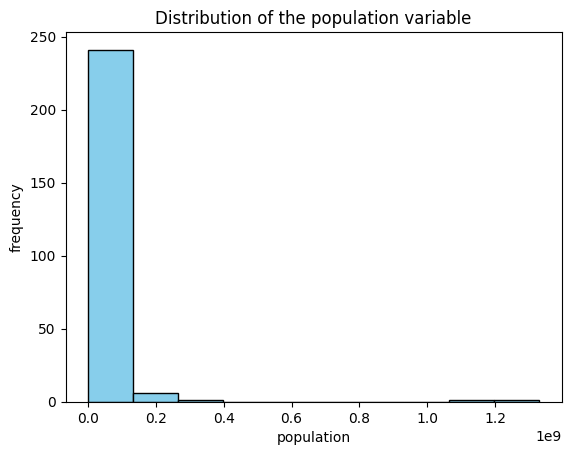

In [32]:
import matplotlib.pyplot as plt

plt.hist(df['population'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('population')
plt.ylabel('frequency')
plt.title('Distribution of the population variable')

plt.show()


3c) ¿Existe alguna correlación entre las variables `Poblacion` y `Area`? Justifica tu respuesta.

In [33]:
correlation = df['population'].corr(df['area'])

print("The Pearson correlation coefficient:", correlation)

if correlation > 0:
    print("There is a positive correlation between population and area")
elif correlation < 0:
    print("There is a negative correlation between population and area")
else:
    print("There is no linear correlation between population and area")


The Pearson correlation coefficient: 0.41262523623266395
There is a positive correlation between population and area
